# TP 1 - Parte 2

In [1]:
from tp1.util import LoadMode

import numpy as np
from tp1 import util as utils

#### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

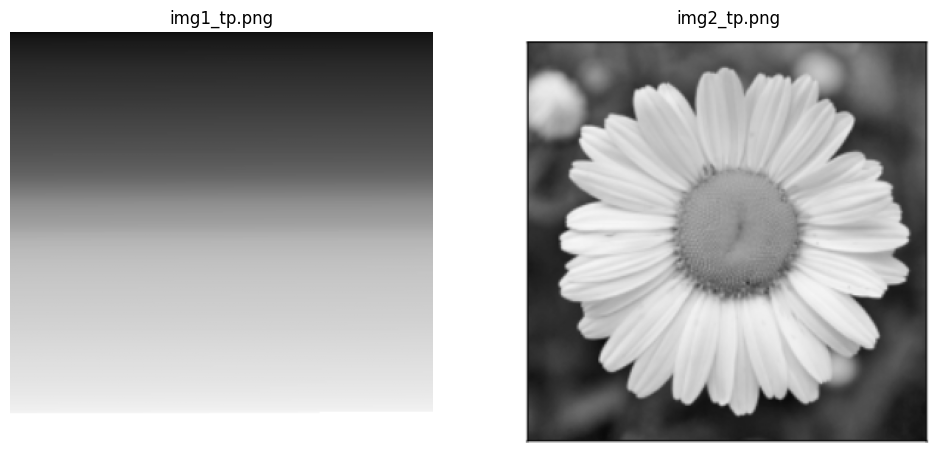

In [2]:
img1 = utils.load_image('material/parte_2/original', 'img1_tp.png', LoadMode.GRAY)
img2 = utils.load_image('material/parte_2/original', 'img2_tp.png', LoadMode.GRAY)

utils.plot_images([img1, img2], grid_size=(1, 2))

#### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

Elegimos 64 bins para tener un histograma con cierta simplificación, pero bastante informativo:

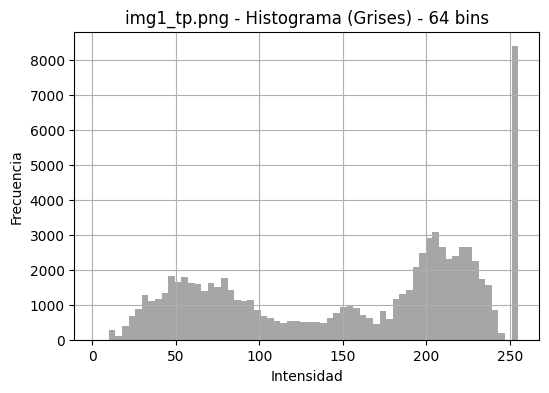

In [3]:
utils.plot_hist(img1, bins=64)

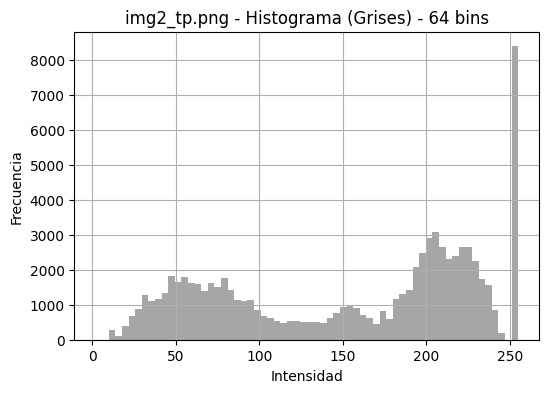

In [4]:
utils.plot_hist(img2, bins=64)

La impresión visual es que los histogramas son idénticos. Vamos a confirmar que esto ocurre para todos los valores de intensidad y que no es casualidad por la cantidad de bins elegidos.

In [5]:
hist_1_full, _ = np.histogram(img1.data.ravel(), bins=256, range=(0, 256))
hist_2_full, _ = np.histogram(img2.data.ravel(), bins=256, range=(0, 256))
np.array_equal(hist_1_full, hist_2_full)

True

Efectivamente, los histogramas son iguales para ambas fotos, a pesar de tratarse de imágenes completamente distintas. En un caso tenemos una flor de tonalidad muy clara, y, por otro lado, tenemos un degradado lineal vertical, de negro a blanco. Esto nos hace pensar que no es de utilidad tomar como "features" los histogramas, a la hora de entrenar un modelo de clasificación/detección, si lo que se requiere en dichos modelos es detectar objetos/formas/rostros. Esto ocurre porque los histogramas destruyen la información espacial.

Podría servir el histograma como feature, en todo caso, para modelos que intenten detectar/clasificar tipos de iluminación o ambientes característicos por su claridad, aunque deberían acompañarse de otras features que identifiquen la falta de dichos conceptos, como en la imagen número 1.